# Linear regression - extra exercises

The following exercises will go through some extra topics to help improve your understanding and intuition

In [1]:
## Import packages

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

# Important for regression, curve fitting, smoothing
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from sklearn import linear_model

# Set size of font for matplotplib
plt.rc('font', size=12) 

print("Done importing packages :)")

Done importing packages :)


--------
## RNA and Protein relationship
The central dogma tells us that DNA is transcribed to RNA which is translated into a protein. Proteins are difficult to observe in the cell, but RNA is quite 'easy'. So often we record the amount of RNA for gene X and assume that we can use the RNA count to estimate the protein count. Is this a good assumption?

If yes, then we should see a highly correlated, very linear relationship between the RNA and protein counts.

Below we'll investigate using 30 randomly sampled genes from the data in [Schwanhäusser et al., 2011](https://www-nature-com.proxy.library.upenn.edu/articles/nature10098)

In [2]:
# RNA molecules/cell in the first column, matched protein molecules/cell in the second column.
rna_protein=np.array([[4.81300000e+01, 7.59187000e+04],
       [1.04500000e+01, 4.71734900e+04],
       [5.91000000e+00, 2.81650200e+04],
       [3.31000000e+00, 8.01429000e+03],
       [3.08400000e+01, 5.10501640e+05],
       [2.29600000e+01, 8.32250900e+04],
       [3.63000000e+00, 9.47810000e+02],
       [1.55800000e+01, 2.89878500e+04],
       [8.50000000e+00, 2.68726130e+05],
       [2.00000000e+01, 3.03753130e+05],
       [2.48000000e+00, 2.36163800e+04],
       [3.21800000e+01, 1.41199720e+05],
       [2.38030000e+02, 2.67488198e+06],
       [8.90700000e+01, 1.97755860e+05],
       [1.76700000e+01, 3.08072700e+04],
       [1.19570000e+02, 1.35270000e+02],
       [4.39000000e+00, 3.76832000e+03],
       [1.13300000e+01, 1.42453100e+04],
       [9.88000000e+00, 1.54796000e+03],
       [7.49100000e+01, 1.15433729e+06],
       [1.01600000e+01, 2.21075600e+05],
       [1.43800000e+01, 2.77751000e+03],
       [7.60000000e+00, 6.36265000e+03],
       [1.15100000e+01, 1.40526600e+04],
       [9.83000000e+00, 6.19777800e+04],
       [1.35600000e+01, 1.12027940e+05],
       [6.29100000e+01, 1.37365337e+06],
       [1.59000000e+01, 7.66850000e+03],
       [2.58800000e+01, 4.67021540e+05],
       [3.47200000e+01, 2.30052900e+05]])

# Separating into just rna and protein to make flow simpler
rna = rna_protein[:, 0]
protein = rna_protein[:, 1]



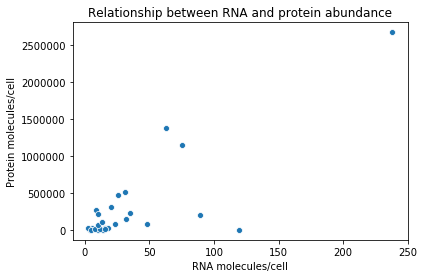

In [3]:
# What does our data look like? 

sns.scatterplot(rna,protein)
plt.xlabel("RNA molecules/cell")
plt.ylabel("Protein molecules/cell")
plt.title("Relationship between RNA and protein abundance");

Let's try fitting a line to these data. Here you can use the formulas given to calculate the slope $b$ and y-intercept $a$, or rewrite the code block and use statsmodels or sklearn.

-38347.55939951743 9479.227026347087


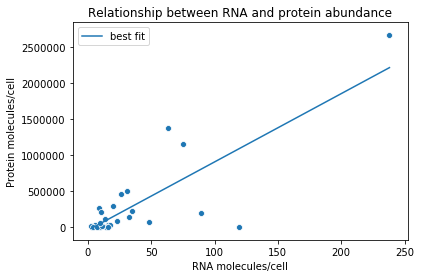

In [4]:
# Calculate the slope and intercept protein = a + b*rna 
rna_mean = np.mean(rna)
protein_mean = np.mean(protein)

# Add your own code to calculate a and b
b = (np.sum((rna - rna_mean)*(protein - protein_mean)))/(np.sum((rna - rna_mean)**2))
a = protein_mean - b*rna_mean

print(a,b)

# Plot the line of best fit

sns.lineplot(rna, a+ (b*rna), label="best fit")
sns.scatterplot(rna, protein)
plt.xlabel("RNA molecules/cell")
plt.ylabel("Protein molecules/cell")
plt.title("Relationship between RNA and protein abundance");

### Did we do a good job? 

A **residual plot** is a scatter plot of the residuals $(Y_i - \hat{Y}_i)$ against the values of the explanatory variable (rna for our case). Linear regression assumes that the variance of y-values is the same across all x-values. So our residual plot _should_ look like dots within a thin horizontal band, vertically centered at 0.

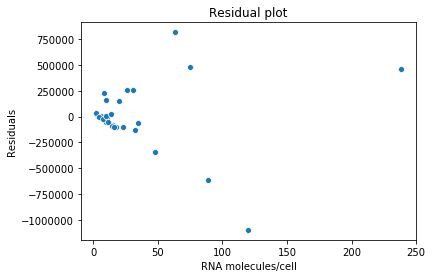

In [5]:
# First calculate the Y hats (the values of protein predicted by our best-fitting line)
protein_hats = a + b*rna

# Calculate the residuals
residuals = protein - protein_hats

# Plot the residual plot
sns.scatterplot(rna, residuals)
plt.xlabel("RNA molecules/cell")
plt.ylabel("Residuals")
plt.title("Residual plot");

This is bad. The fit gets worse and worse as we have more RNA molecules/cell. Definitely we cannot assume that the variance of Y-values at each value of X is the same.

What do we do instead?


## Data tranformations

In statistics, if the original data don't fit the assumptions of a particular statistical test, often times we try [transforming](http://www.biostathandbook.com/transformation.html) the data and if a transformation of our data fit the assumptions, we can proceed. We can try transforming our RNA/protein data to see if it will fit the linear regression assumptions.
What transformation should we try here?


7.971840726818917 0.9562561334346725


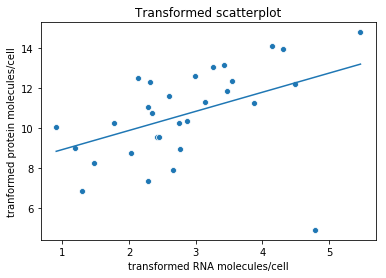

In [6]:
## What transformation should we try? 

transformed_protein = np.log(protein)
transformed_rna = np.log(rna)

# Check our transformation using a scatterplot and show regression line

b_transformed = (np.sum((transformed_rna - transformed_rna.mean())*(transformed_protein - transformed_protein.mean())))/(np.sum((transformed_rna - transformed_rna.mean())**2))
a_transformed = transformed_protein.mean() - b_transformed*transformed_rna.mean()


# Plot!
sns.scatterplot(transformed_rna, transformed_protein)
sns.lineplot(transformed_rna, a_transformed + b_transformed*transformed_rna)
# Change labels!
plt.xlabel("transformed RNA molecules/cell")
plt.ylabel("tranformed protein molecules/cell")
plt.title("Transformed scatterplot");

print(a_transformed,b_transformed)

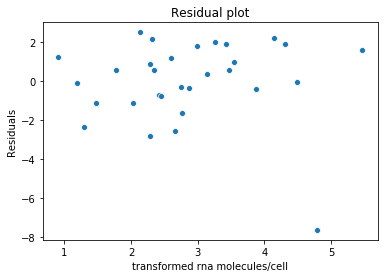

In [7]:
# Check residual plot after our transformation. Is it any better?

transformed_protein_hats = a_transformed + b_transformed*transformed_rna
transformed_residuals = transformed_protein - transformed_protein_hats

sns.scatterplot(transformed_rna, transformed_residuals)
plt.xlabel("transformed rna molecules/cell")
plt.ylabel("Residuals")
plt.title("Residual plot");

Fitting assumptions is not the only way transformations help us. Let's say we had a relationship that was not so linear looking...

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


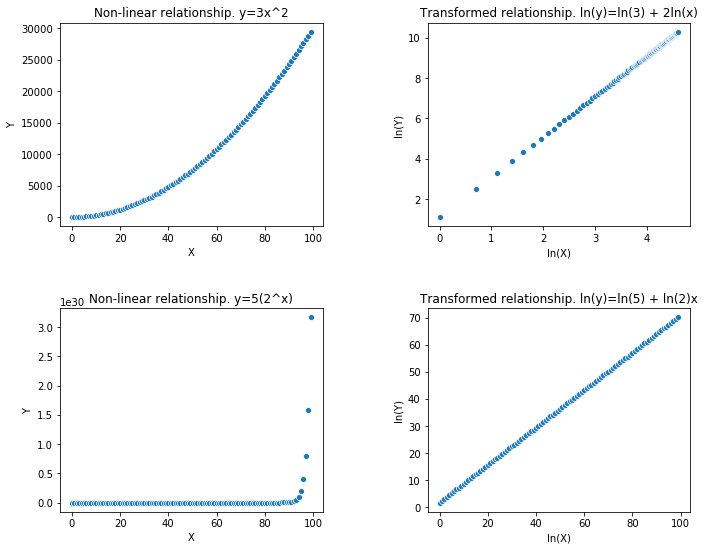

In [8]:
# Generate random data
x_values = np.arange(100)
y1_values = 3*(x_values)**2
y2_values = 5*np.float_power(2, x_values)

plt.figure(figsize=(10,9))

plt.subplot(2, 2, 1)
sns.scatterplot(x_values, y1_values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-linear relationship. y=3x^2")

plt.subplot(2,2,2)
sns.scatterplot(np.log(x_values), np.log(y1_values))
plt.xlabel("ln(X)")
plt.ylabel("ln(Y)")
plt.title("Transformed relationship. ln(y)=ln(3) + 2ln(x)")

plt.subplot(2,2,3)
sns.scatterplot(x_values, y2_values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-linear relationship. y=5(2^x)")

plt.subplot(2,2,4)
sns.scatterplot(x_values, np.log(y2_values))
plt.xlabel("ln(X)")
plt.ylabel("ln(Y)")
plt.title("Transformed relationship. ln(y)=ln(5) + ln(2)x")

# Adjust spacing between the subplots
plt.subplots_adjust(bottom=None, right=1, top=None, wspace=0.4, hspace = 0.4)

## Extrapolating 

So now we have a decent linear relation. Does that mean that when we measure the RNA abundance of a new gene, that we can immediately know it's protein level?

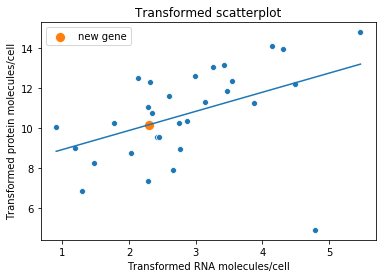

In [9]:
# Pick an RNA expression count for some new gene
new_gene_rna = 10

# Plot the new data point where we expect it to fall on our scatter
transformed_new_gene = np.log(new_gene_rna)

# Plot!

sns.scatterplot(transformed_rna, transformed_protein)
sns.lineplot(transformed_rna, a_transformed + b_transformed*transformed_rna)
sns.scatterplot([transformed_new_gene], [a_transformed + b_transformed*transformed_new_gene], s=100, label = "new gene")

plt.xlabel("Transformed RNA molecules/cell")
plt.ylabel("Transformed protein molecules/cell")
plt.title("Transformed scatterplot");

But what if we saw 0 RNA molecules? What does our model say about the protein levels?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


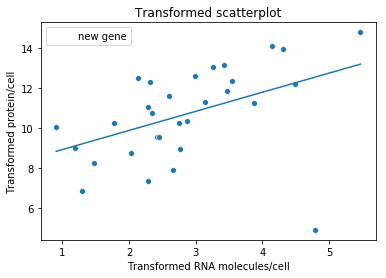

In [10]:
## Change the value of new_gene_rna 

new_gene_rna = 0

# Plot the new data point where we expect it to fall on our scatter
transformed_new_gene = np.log(new_gene_rna)

# Plot!
sns.scatterplot(transformed_rna, transformed_protein)
sns.lineplot(transformed_rna, a_transformed + b_transformed*transformed_rna)
sns.scatterplot([transformed_new_gene], [a_transformed + b_transformed*transformed_new_gene], s=100, label = "new gene")

plt.xlabel("Transformed RNA molecules/cell")
plt.ylabel("Transformed protein/cell")
plt.title("Transformed scatterplot");

So if we see 0 expression, we still expect non-zero protein levels!

**Warning** Extrapolating beyond the range of values we used to perform the regression can lead to impossible and unlikely results -- **Don't do it!**

------
## Effects of error

Let's give the researchers a break -- there was probably just a lot of measurement error in the observations. Maybe the relationship is real but the act of measuring these quantities has some inherant noise. 

While we may not be able to answer that question, what *would* error do to a real linear relationship?

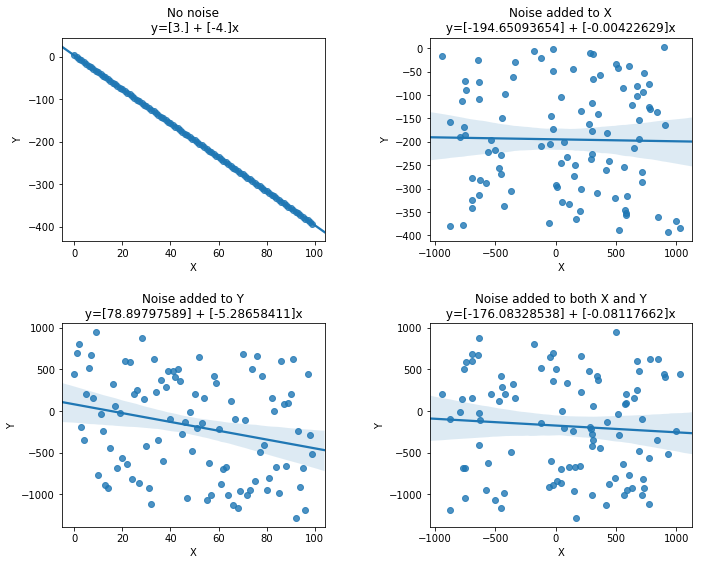

In [11]:
# Use the same x_values as before
y_values = 3 - 4*x_values

# To make things quicker, use sklearn to calculate linear regression values
from sklearn import linear_model

regr = linear_model.LinearRegression()


plt.figure(figsize=(10,9))

# Plot the original data
plt.subplot(2, 2, 1)

regr.fit(x_values.reshape(-1,1), y_values.reshape(-1,1))

sns.regplot(x_values, y_values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f'No noise\n y={regr.intercept_} + {regr.coef_[0]}x')

# Add noise JUST to x values
# Adjust the low, high values to adjust the noise range
x_values_noise = x_values + np.random.uniform(low=-1000,high=1000, size=x_values.size)


regr.fit(x_values_noise.reshape(-1,1), y_values.reshape(-1,1))

plt.subplot(2,2,2)
sns.regplot(x_values_noise, y_values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Noise added to X\n y={regr.intercept_} + {regr.coef_[0]}x ")



# Add noise to JUST the y values
y_values_noise = y_values + np.random.uniform(low=-1000, high=1000, size = y_values.size)

regr.fit(x_values.reshape(-1,1), y_values_noise.reshape(-1,1))

plt.subplot(2,2,3)
sns.regplot(x_values, y_values_noise)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Noise added to Y\n y={regr.intercept_} + {regr.coef_[0]}x ")


# Add noise to both

regr.fit(x_values_noise.reshape(-1,1), y_values_noise.reshape(-1,1))

plt.subplot(2,2,4)
sns.regplot(x_values_noise, y_values_noise, fit_reg=True)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Noise added to both X and Y\n y={regr.intercept_} + {regr.coef_[0]}x ")

# Adjust spacing between the subplots
plt.subplots_adjust(bottom=None, right=1, top=None, wspace=0.4, hspace = 0.4)

_____

## Regression towards the mean

This concept is a little tricky, so we will demonstrate with our collected standing jump data. 

The overall idea is that if you measure something on an individual and then measure that something again at a later date, the natural variability in the individual will lessen the regression slope. From The Analysis of Biological Data (Whitlock):

> Regression toward the mean results when two variables measured on a sample of individuals have a correlation less than one. Individuals that are far from the mean for one of the measurements will, on average, lie closer to the mean for the other measurements.

Let's see if we observe this phenomenon with our jumping data.

In [12]:
## Data

heights = np.array([64, 64, 67, 62, 62.5, 68, 73, 73, 63, 64, 69, 64, 60])

jump1 = np.array([132, 74, 60, 49, 52, 46, 40, 90, 71, 73, 67, 30, 41])

jump2 = np.array([130, 75, 60, 52, 50, 40.5, 43, 87, 68, 76, 65, 26, 50])

avg_jump = np.mean([jump1, jump2], axis=0)

# Let's put the data into a pandas dataframe to match what we did before
jump_df = pd.DataFrame({"height": heights, "jump1": jump1, "jump2": jump2, "avg_jump": avg_jump})
jump_df.head()

,height,jump1,jump2,avg_jump
0,64.0,132,130.0,131.0
1,64.0,74,75.0,74.5
2,67.0,60,60.0,60.0
3,62.0,49,52.0,50.5
4,62.5,52,50.0,51.0


The mean of jump 1 results = 63.46153846153846 in 
 and the mean of jump 2 results = 63.26923076923077 in


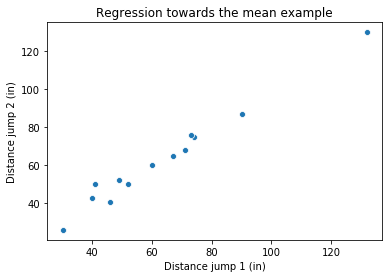

In [13]:
# Scatter the first jump results against the second jump

print(f"The mean of jump 1 results = {np.mean(jump1)} in \n and the mean of jump 2 results = {np.mean(jump2)} in")
sns.scatterplot(jump1, jump2)
plt.xlabel("Distance jump 1 (in)")
plt.ylabel("Distance jump 2 (in)")
plt.title("Regression towards the mean example");

Do you think regression towards the mean is a problem here? Why or why not?


Regression towards the mean can be a real problem for medical studies. For example, if we looked at the response of sick individuals to a treatment, people will appear to get better even though the treatment may have had no effect, just because the individuals well-being is tending back towards the average. Having a control group in your study prevents this misinterpretation.

-----

## Fitting data to curves

Today we saw many examples of how to find curves or functions that fit our data. However, perhaps the most important lesson is the one in the following code block. Curve fitting is a blanace between finding a function that approprately fits the data we have, and using a function that is general enough to reasonably help us make expectations about what new data might look like. Consider the example below.

(-1, 1)

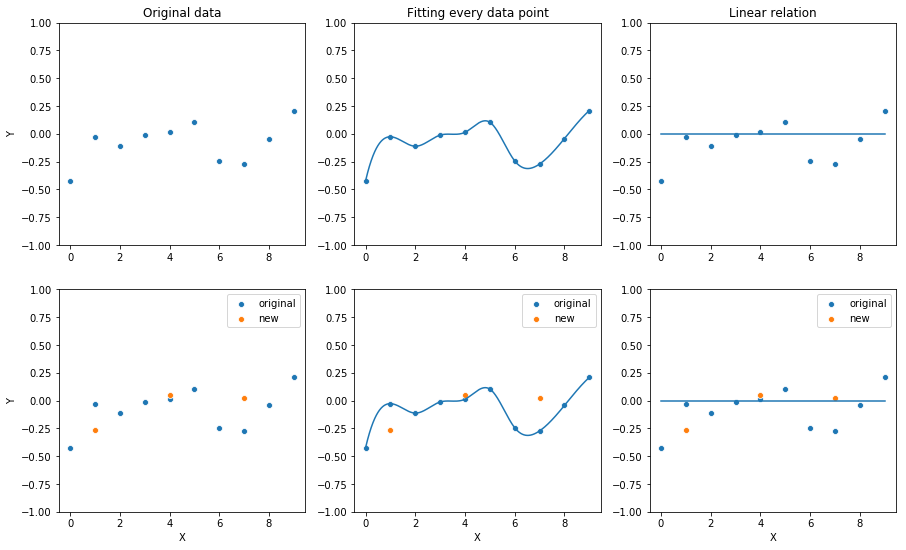

In [14]:
# Make some fake x data
x = np.arange(10)

# Now choose y values that all come from the same normal distribution
y = np.random.normal(0,0.2,x.size)

# Draw a scatterplot of the data
plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
sns.scatterplot(x,y)
plt.title("Original data")
plt.ylabel("Y")
plt.ylim(-1,1)

# Let's draw a curve that really nicely hits every point in our data
interpolated_function_y = interp1d(x, y, kind='cubic')

# Plot this function atop the scatter
plt.subplot(2,3,2)
sns.scatterplot(x,y)
sns.lineplot(np.linspace(0,9,1000), interpolated_function_y(np.linspace(0,9,1000)))
plt.title("Fitting every data point")
plt.ylim(-1,1)

# But really we just have data distributed along the vertical line y=0. So the actual relation is linear.
plt.subplot(2,3,3)
sns.scatterplot(x,y)
sns.lineplot(x, np.zeros(x.size))
plt.title("Linear relation")
plt.ylim(-1,1)


# Okay so obviously the interpolated curve fits better. But the real test comes when we get NEW data.
# How well do our fits predict where new data might lie?

# Make 3 new data points
x_new = np.random.randint(9, size =3)
y_new = np.random.normal(0,0.2,x_new.size)

# Draw the updated scatterplot
plt.subplot(2,3,4)
sns.scatterplot(x,y, label = "original")
sns.scatterplot(x_new,y_new, label = "new")
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-1,1)

# Would these new points fall near our original highly complicated curve?
plt.subplot(2,3,5)
sns.scatterplot(x,y, label = "original")
sns.lineplot(np.linspace(0,9,1000), interpolated_function_y(np.linspace(0,9,1000)))
sns.scatterplot(x_new,y_new, label = "new")
plt.xlabel("X")
plt.ylim(-1,1)

# What about the line?
plt.subplot(2,3,6)
sns.scatterplot(x,y, label = "original")
sns.lineplot(x, np.zeros(x.size))
sns.scatterplot(x_new,y_new, label = "new")
plt.xlabel("X")
plt.ylim(-1,1)



Above, we see that when using a curve that fits every single datapoint perfectly, we generally have trouble when new datapoints come along. This happens because the curve has _overfit_ the data. Instead, using a mathematically simpler curve (here a line) results in more reasonable predictions when new datapoints are added. 

------
## Other examples of nonlinear fitting - Quadratic equations

We can use curve fitting to fit data to any curve -- including a quadratic curve: 
$$ y = a+bx+cx^2$$
Let's take a look at how that works...

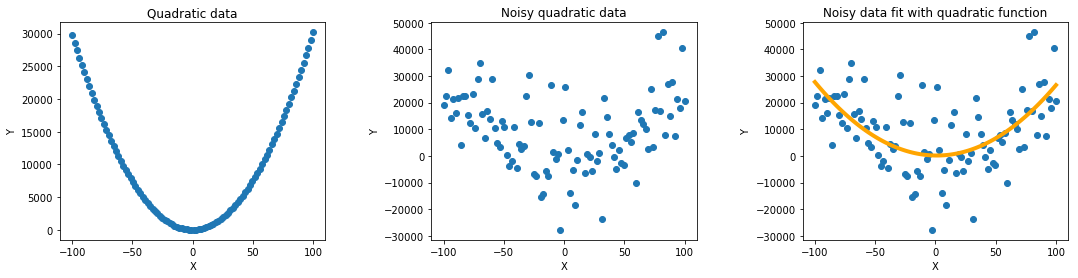

In [15]:
# First let's define x and y values
x_quad = np.linspace(-100,100,100)
y_quad = 5+2*x_quad+ 3*x_quad**2

# add noise
y_quad_noise = y_quad + 10000 * np.random.normal(size=x_quad.size)


# define quadratic fit a + b*(x-c)**2
def quad_func(x,a,b,c):
    return a + b*x+c*x**2

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.scatter(x_quad, y_quad)
plt.title("Quadratic data")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,3,2)
plt.scatter(x_quad, y_quad_noise)
plt.title("Noisy quadratic data")
plt.xlabel("X")
plt.ylabel("Y")

popt_quad, pcov_quad = curve_fit(quad_func, x_quad, y_quad_noise)
plt.subplot(1,3,3)
plt.scatter(x_quad, y_quad_noise)
plt.plot(x_quad, quad_func(x_quad, *popt_quad), '-',
         color ="orange",
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_quad),
         linewidth = 4)
plt.title("Noisy data fit with quadratic function")
plt.xlabel("X")
plt.ylabel("Y")


plt.subplots_adjust(bottom=None, right=1, top=None, wspace=0.4, hspace = 0.4)



Of course we don't have to stop at quadratic functions. With curve fitting the possibilities are endless!